# 自然语言处理

### 分词

Populating the interactive namespace from numpy and matplotlib
词组总数:18531
词组数:876
平均每词出现次数:21.15


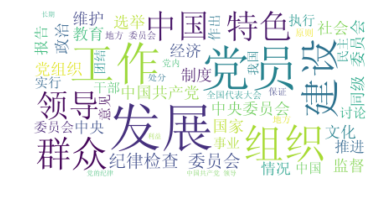

In [5]:
import jieba #
#jieba.load_userdict('userdict.txt')  # 创建停用词list  
def stopwordslist(filepath): 
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()] 
    return stopwords # 对句子进行分词  

def seg_sentence(sentence): 
    sentence_seged = jieba.cut(sentence.strip()) 
    stopwords = stopwordslist('./stopwords.txt') # 这里加载停用词的路径  
    outstr = '' 
    for word in sentence_seged: 
        if word not in stopwords: 
            if word != '\t': 
                outstr += word 
                outstr += " " 
    return outstr 

inputs = open(r'c:/DataSet_ML/dangzhang.txt') 
outputs = open('./output.txt', 'w',encoding='utf-8') 
for line in inputs: 
    line_seg = seg_sentence(line) # 这里的返回值是字符串  
    outputs.write(line_seg + '\n') 
outputs.close() 
inputs.close() 


from nltk.probability import FreqDist
def showInfo(cut_txt):
    fdist = FreqDist(cut_txt)
    print("词组总数:%d"%len(cut_txt))
    print("词组数:%d"%len(fdist))
    print("平均每词出现次数:%.2f"%(len(cut_txt)/len(fdist)))
    return fdist

from wordcloud import WordCloud
myfile = open('./output.txt','r',encoding='utf-8')
mytext = ''
for line in myfile:
    mytext+=line

wordcloud = WordCloud(font_path="simsun.ttf",background_color='white',max_words=50).generate(mytext)

%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
a=showInfo(mytext)

In [53]:
# coding:utf-8
import os
import jieba
import re



_STOP_WORDS = frozenset([])

def word_split(text):
    word_list = []
    pattern = re.compile(u'[\u4e00-\u9fa5]+')
    jieba_list = list(jieba.cut(text))
    time = {}
    for i, c in enumerate(jieba_list):
        if c in time:  # record appear time
            time[c] += 1
        else:
            time.setdefault(c, 0) != 0
        if pattern.search(c):  # if Chinese
            word_list.append((len(word_list), (text.index(c, time[c]), c)))
            continue
        if c.isalnum():  # if English or number
            word_list.append((len(word_list), (text.index(c, time[c]), c.lower())))  # include normalize

    return word_list


def words_cleanup(words):
    cleaned_words = []
    for index, (offset, word) in words:  # words-(word index for search,(letter offset for display,word))
        if word in _STOP_WORDS:
            continue
        cleaned_words.append((index, (offset, word)))
    return cleaned_words


def word_index(text):
    words = word_split(text)
    words = words_cleanup(words)
    return words


def inverted_index(text):
    inverted = {}

    for index, (offset, word) in word_index(text):
        locations = inverted.setdefault(word, [])
        locations.append((index, offset))

    return inverted


def inverted_index_add(inverted, doc_id, doc_index):
    for word, locations in doc_index.iteritems():
        indices = inverted.setdefault(word, {})
        indices[doc_id] = locations
    return inverted


def search(inverted, query):
    words = [word for _, (offset, word) in word_index(query) if word in inverted]  # query_words_list
    results = [set(inverted[word].keys()) for word in words]
    # x = map(lambda old: old+1, x) 
    doc_set = reduce(lambda x, y: x & y, results) if results else []
    precise_doc_dic = {}
    if doc_set:
        for doc in doc_set:
            index_list = [[indoff[0] for indoff in inverted[word][doc]] for word in words]
            offset_list = [[indoff[1] for indoff in inverted[word][doc]] for word in words]

            precise_doc_dic = precise(precise_doc_dic, doc, index_list, offset_list, 1)  # 词组查询
            precise_doc_dic = precise(precise_doc_dic, doc, index_list, offset_list, 2)  # 临近查询
            precise_doc_dic = precise(precise_doc_dic, doc, index_list, offset_list, 3)  # 临近查询

        return precise_doc_dic
    else:
        return {}


def precise(precise_doc_dic, doc, index_list, offset_list, range):
    if precise_doc_dic:
        if range != 1:
            return precise_doc_dic  # 如果已找到词组,不需再进行临近查询
    phrase_index = reduce(lambda x, y: set(map(lambda old: old + range, x)) & set(y), index_list)
    phrase_index = map(lambda x: x - len(index_list) - range + 2, phrase_index)

    if len(phrase_index):
        phrase_offset = []
        for po in phrase_index:
            phrase_offset.append(offset_list[0][index_list[0].index(po)])  
        precise_doc_dic[doc] = phrase_offset
    return precise_doc_dic


documents = {}
f1 = open(r'c:/DataSet_ML/xinwen/新闻1.txt').read()
f2 = open(r'c:/DataSet_ML/xinwen/新闻2.txt',encoding='utf-8').read()
f3 = open(r'c:/DataSet_ML/xinwen/新闻3.txt',encoding='utf-8').read()
f4 = open(r'c:/DataSet_ML/xinwen/新闻4.txt',encoding='utf-8').read()
f5 = open(r'c:/DataSet_ML/xinwen/新闻5.txt').read()
documents.setdefault(f1.decode())
documents.setdefault(f2)
documents.setdefault(f3)
documents.setdefault(f4)
documents.setdefault(f5)
print(len(documents))
    
for doc_id, text in documents.items():
    doc_index = inverted_index(text)
    inverted_index_add(inverted, doc_id, doc_index)
# Print Inverted-Index



AttributeError: 'str' object has no attribute 'decode'

In [84]:
from nltk.text import TextCollection
import jieba

def stopwordslist(filepath): 
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()] 
    return stopwords # 对句子进行分词  


def stop:
    

# def seg_sentence(sentence): 
#     sentence_seged = list(jieba.cut(sentence.strip())) 
# #     stopwords = stopwordslist('./stopwords.txt') # 这里加载停用词的路径  
# #     outstr = '' 
# #     for word in sentence_seged: 
# #         if word not in stopwords: 
# #             if word != '\t': 
# #                 outstr += word 
# #                 outstr += " " 
# #     return list(outstr) 
#     return seg_sentence

# input1 = open(r'c:/DataSet_ML/nlp/新闻1.txt', 'r', encoding='utf-8') 
# output1 = open('./output1.txt', 'w',encoding='utf-8') 
# for line in input1: 
#     line_seg = seg_sentence(line) # 这里的返回值是字符串  
#     output1.write(line_seg + '\n') 
# output1.close() 
# input1.close() 

# input1


input1=open(r'c:/DataSet_ML/nlp/新闻1.txt')
input2=open(r'c:/DataSet_ML/nlp/新闻2.txt',encoding='utf-8')
input3=open(r'c:/DataSet_ML/nlp/新闻3.txt',encoding='utf-8')

for line in input1: 
    line_seg1 = list(jieba.cut(line)) # 这里的返回值是字符串
for line in input2: 
    line_seg2 = list(jieba.cut(line))# 这里的返回值是字符串 
for line in input3: 
    line_seg3 = list(jieba.cut(line)) # 这里的返回值是字符串 

sent=[line_seg1,line_seg2,line_seg3]
corpus=TextCollection(sent)
print(sent)

tf_idfmax=0;

for word in corpus:
    tf_idf=corpus.tf_idf(word,corpus)
    if tf_idf>=tf_idfmax:
        tf_idfmax=tf_idf
print(tf_idfmax)
    

[['当前', '，', '面对', '新一轮', '科技', '革命', '、', '日益加剧', '的', '国际', '科技', '竞争', '形势', '以及', '我国', '国家', '源头', '创新', '的', '迫切', '需求', '，', '全国', '高校', '紧抓', '“', '双', '一流', '”', '高校', '建设', '机遇', '，', '正在', '紧锣密鼓', '实施', '科技', '强校', '、', '人才', '强校', '战略', '，', '新', '时代', '对', '高校', '新', '科技', '发展', '提出', '更高', '要求', '和', '挑战', '。', '作为', '地方', '高校', '，', '在', '持续', '高位', '稳定', '运行', '的', '情况', '下', '基金', '工作', '若', '要', '继续', '保持良好', '发展', '态势', '，', '还', '需要', '广大', '科研人员', '继续', '夯实', '基础', '，', '不懈努力', '，', '加强', '学术交流', '；', '各', '二级', '单位', '广泛', '发动', '，', '点面结合', '，', '分类', '辅导', '；', '科研', '管理', '部门', '精心', '筹划', '，', '加强', '辅导', '，', '强力', '推进', '，', '确保', '我校', '基金', '申报', '和', '管理工作', '稳步', '提升', '，', '为', '学校', '加快', '推进', '“', '双', '一流', '”', '建设', '提供', '强力', '支撑', '。'], ['下一阶段', '，', '学校', '将', '做好', '2019', '年', '国家', '社科', '基金', '年度', '项目', '和', '青年', '项目', '的', '开题', '工作', '，', '确保', '项目', '顺利开展', '并', '取得', '高质量', '的', '研究成果', '。', '同时', '，', '人文', '社科', '处', '将', '与', '各',

In [63]:
sents=['人工智能存在伦理问题','人工智能是云计算的热点']
sents=[list(jieba.cut(sent)) for sent in sents]
print(sents)

# corpus=TextCollection(sents)
# print(corpus)

# tf=corpus.tf('伦理',corpus)
# print(tf)



[['人工智能', '存在', '伦理', '问题'], ['人工智能', '是', '云', '计算', '的', '热点']]
